# 18.06 pset 8 - Solutions


## Problem 1: Google PageRank

Consider the following network from pset 5:

<img src="https://github.com/stevengj/1806-spring17/raw/master/psets/pset5/pset5-p2.png" width="260" height="262">

Suppose that nodes represent 6 web pages, and the edges represent links (e.g. page 2 links to page 6 via edge 7).

Imagine a random web surfer who

* Starts on page 1 (node 1).
* With probability $p = 0.85$ (85%), she picks a link at random from the current node (with an equal chance for each edge starting at the current node) and follows it.
* With probability $1-p = 0.15$ (15%), she jumps to a random web page (1 to 6) with equal probability, regardless of what is linked to from the current page.

For example, if she is at page 4, she will next visit page 1 with probability $(1-p)/6 = 0.025$ (2.5%), page 2 with probability 0.025, page 3 with probability 0.025, page 4 with probability 0.025, page 5 with probability $p/2 + (1-p)/6 = 0.45$ (45%), and page 6 with probability 0.45.

### (a)

Express these transition probabilities in the form of a Markov matrix $M$.   That is, the $j$-th column of $M$ should be the probabilities of visiting each node starting from $j$.

Enter your matrix `M` in Julia.  (Make sure to check that the sum of each column is 1 via `sum(M, 1)` as in class.)

(The adjacency matrix for this graph, from pset 5, might be helpful.)

### (b)

Averaging over a long (infinite) time, what fraction of her visits go to each of the 6 nodes?  

(You can use the Julia `eig` function to get the eigenvalues and eigenvectors of $M$, as in class.  Be careful with your normalization.)

This fraction is the Google [PageRank](https://en.wikipedia.org/wiki/PageRank) and is the basis for how Google ranks pages in its search results.  Which is the "most important" (highest-ranking) page in your graph by this measure?

### (c)

In practice, the Markov matrix represent the real web is too huge for Google to exactly compute the steady-state eigenvector.  Instead, it starts with a random vector and just multiplies by $M$ a few times to get an approximation for the steady state.

If you start with the "random" vector `x = [0.28,0.2,0.01,0.21,0.19,0.11]` (whose components sum to 1), how many times do you need to multiply it by $M$ to get the correct pagerank to two decimal places for all 6 pages?  (You can use `round.(x,2)` to round a vector to two decimal places in Julia.)

### Solution

#### (a)
The matrix $M$ is


In [1]:
M=[0.025 0.450 0.025 0.025 0.025 0.025
   0.025 0.025 0.875 0.025 0.025 0.025
   0.025 0.025 0.025 0.025 0.025 0.875
   0.875 0.025 0.025 0.025 0.025 0.025
   0.025 0.025 0.025 0.450 0.025 0.025
   0.025 0.450 0.025 0.450 0.875 0.025]

6×6 Array{Float64,2}:
 0.025  0.45   0.025  0.025  0.025  0.025
 0.025  0.025  0.875  0.025  0.025  0.025
 0.025  0.025  0.025  0.025  0.025  0.875
 0.875  0.025  0.025  0.025  0.025  0.025
 0.025  0.025  0.025  0.45   0.025  0.025
 0.025  0.45   0.025  0.45   0.875  0.025

Rather than typing it in manually, however, we can alternatively compute it from the adjacency matrix $A$ for this graph, supplied with pset 5:

In [2]:
A = [0 0 0 1 0 0
     1 0 0 0 0 1
     0 1 0 0 0 0
     0 0 0 0 1 1
     0 0 0 0 0 1
     0 0 1 0 0 0]

6×6 Array{Int64,2}:
 0  0  0  1  0  0
 1  0  0  0  0  1
 0  1  0  0  0  0
 0  0  0  0  1  1
 0  0  0  0  0  1
 0  0  1  0  0  0

In particular, note that $A_{ij} = 1$ if there is a link from $i$ to $j$.  However, for the Markov matrix, we actually want the reverse: we want an entry in $ji$ if there is a link from $j$ to $i$.  So, we should use the *transpose* of the matrix $A$.

There are three further steps:

1. We have to normalize $A^T$ by dividing each column by its sum, corresponding to an equal probability of following each link.

2. We then multiply by $p = 0.85$ and add $(1-p)/6$ to *all* of the entries.

It is good to get in the habit of transforming one matrix into another mathematically this way, rather than typing in each matrix, since typing in matrices by hand is not practical for large matrices.

In [3]:
p = 0.85
M = A' ./ sum(A',1) * p + (1-p)/size(A,1)

6×6 Array{Float64,2}:
 0.025  0.45   0.025  0.025  0.025  0.025
 0.025  0.025  0.875  0.025  0.025  0.025
 0.025  0.025  0.025  0.025  0.025  0.875
 0.875  0.025  0.025  0.025  0.025  0.025
 0.025  0.025  0.025  0.45   0.025  0.025
 0.025  0.45   0.025  0.45   0.875  0.025

(This is the same matrix as the one we typed by hand.)

Let us check that it is a Markov matrix (that is that the sums of each column's component is 1)

In [4]:
sum(M,1)

1×6 Array{Float64,2}:
 1.0  1.0  1.0  1.0  1.0  1.0

#### (b)
Averaging over a very long amount of time, the fraction of time spent on each node is given by the steady status vector of the system, that is the eigenvector of eigenvalue 1 (if there is only one). Let us find the eigenvectors and eigenvalues of the matrix $M$

In [5]:
λ,X = eig(M)

(Complex{Float64}[1.0+0.0im,0.252931+0.577825im,0.252931-0.577825im,-0.443494+0.630833im,-0.443494-0.630833im,-0.468874+0.0im],
Complex{Float64}[-0.269345+0.0im -0.144285+0.32962im … -0.174878+0.248749im -0.33929+0.0im; -0.498699+0.0im -0.534016+0.0im … 0.551709-0.0im 0.374316+0.0im; … ; -0.179093+0.0im 0.308764-0.106791im … 0.178158+0.0488218im -0.557527+0.0im; -0.54327+0.0im 0.199495-0.216045im … -0.153687+0.427272im 0.113897+0.0im])

In particular the eigenvector corresponding to the eigenvalue 1 is

In [6]:
v=X[:,1]

6-element Array{Complex{Float64},1}:
 -0.269345+0.0im
 -0.498699+0.0im
 -0.519177+0.0im
 -0.286342+0.0im
 -0.179093+0.0im
  -0.54327+0.0im

Since we want this to represent probabilities, however, we want to normalize (scale) it so that the sum of its entries are 1.  (Note that this *choice* of normalization depends on the problem you are solving!  It is the right choice for a Markov problem, but maybe not for other applications.)

By default, Julia normalizes the eigenvectors to have *length* $\Vert x \Vert = 1$, which is not what we want.  We can rescale it to have sum = 1 by:

In [7]:
v/sum(v)

6-element Array{Complex{Float64},1}:
  0.117314-0.0im
   0.21721-0.0im
   0.22613-0.0im
  0.124717-0.0im
 0.0780048-0.0im
  0.236623-0.0im

Which is the desired result.  For example, note that the biggest "pagerank" in this graph is for node 6 (rank = 0.236623), which is not too surprising if you look at the graph: a lot of "web pages" link to 6.

#### (c)
If we set the "random vector"

In [8]:
x = [0.28,0.2,0.01,0.21,0.19,0.11]

6-element Array{Float64,1}:
 0.28
 0.2 
 0.01
 0.21
 0.19
 0.11

The smallest number of iterations (the smallest power of $M$) needed to have a two-digit precision is 17.

For illustration, the following code outputs a matrix consisting of iterations 9 through 17.   You can see that by iteration 9 it is *almost* right, and all of the subsequent iterations before 17 are off by only one digit in a component or two:

In [9]:
hcat([round.(M^n*x,2) for n = 9:17]...)

6×9 Array{Float64,2}:
 0.12  0.12  0.11  0.12  0.12  0.12  0.12  0.12  0.12
 0.23  0.21  0.22  0.22  0.21  0.22  0.22  0.22  0.22
 0.22  0.23  0.23  0.22  0.23  0.23  0.22  0.23  0.23
 0.12  0.13  0.13  0.12  0.13  0.13  0.12  0.13  0.12
 0.08  0.07  0.08  0.08  0.08  0.08  0.08  0.08  0.08
 0.24  0.24  0.23  0.24  0.24  0.23  0.24  0.24  0.24

compared to the exact eigenvector rounded to two digits:

In [10]:
round.(real(v/sum(v)), 2)

6-element Array{Float64,1}:
 0.12
 0.22
 0.23
 0.12
 0.08
 0.24

From class, this fast convergence is illustrative of the *power method*.  As we saw in class, the decay rate of the "error" term is determined by the *next-biggest* eigenvalue:

In [11]:
abs.(λ)

6-element Array{Float64,1}:
 1.0     
 0.630758
 0.630758
 0.771128
 0.771128
 0.468874

Since there are two eigenvalues with magnitude 0.77, we'd expect the error to decay as $(0.77/1)^n$.  So it decays by a factor of 100 (corresponding to about two decimal place) in $n=\log(0.01)/\log(0.77)$ iterations

In [12]:
log(0.01)/log(0.77)

17.61970555304031

or about 17–18 iterations, exactly matching what we observed "experimentally" above!

(In fact, this match with theory is almost *too* good, because the error term also depends upon the initial condition, since the initial vector $x$ determines the coefficient of each eigenvector.  We got a bit lucky here in getting such a good match.  In general, we'd only expect to get roughly the right order of magnitude this way.)



## Problem 2: Ladders and Chutes

In class, we analyzed the expected number of moves to finish a 1-player "Chutes and Ladders" game.   For variety, my daughter likes to change the rules sometimes.  One variant that she likes is "Ladders and Chutes", in which the ladders and chutes are *reversed*: the ladders go down, and the chutes go up.  How does this change the expected number of moves to finish?

**Correction**: Chutes & Ladders has a ladder from position 80 to position 100.  If this becomes a chute, then the game would never finish.  In the "Ladders and Chutes" game, simply delete this ladder.

(There is a simple way to change the transition matrix $T$ — which is actually a form of [adjacency matrix](https://en.wikipedia.org/wiki/Adjacency_matrix) similar to pset 5 — from the lecture notes, in order to reverse the direction of the ladders/chutes, at least for the off-diagonal elements of $T$.  However you do it, only trivial changes to the code from the lecture notes should be required.)

### Solution
We proceed as in class, constructing the Markov matrix for the "boring" chutes and ladders, and the the transition matrix.  Let's start with exactly the M and T matrices from class, so that we can compare with the new matrices:

In [13]:
e₁ = zeros(101); e₁[1] = 1
M = zeros(101,101)
for i = 2:100
    M[i,max(1,i-6):(i-1)] = 1/6
end
# last row
for i = 1:6
    M[101,101-i] = (7-i)/6 # = 6/6, 5/6, 4/6, ..., 1/6
end
M[101,101] = 1 # once we get to the last space, we stay there

T = zeros(101,101)
for t in (1=>39, 4=>14, 9=>31, 28=>84, 36=>44, 51=>67, 80=>100, 71=>91, # ladders
          16=>6, 47=>26, 49=>11, 56=>53, 64=>60, 92=>73, 95=>75, 98=>78) # chutes
    T[t[2]+1,t[1]+1] = 1
end
# Set T[j,j] = 1 in spaces with no chute/ladder
for j = 1:101
    if all(T[:,j] .== 0)
        T[j,j] = 1
    end
end

To construct the "Ladders and Chutes" matrix, we only need to change $T$ to a new matrix $\tilde{T}$.   We could do that by rewriting the code above to change the directions, e.g. the ladders line changes from `1=>39, 4=>14, ...` to `39=>1, 14=>4, ...`.  This is fine.  But it is more fun to be clever.

A fun trick is to realize that changing the direction of the ladders and chutes corresponds to *transposing* the off-diagonal part of the $T$ matrix.  Unfortunately the diagonal part (spaces that aren't the start of a chute/ladder) changes in a trickier way.

In [14]:
T̃ = (T - diagm(diag(T)))' # transpose the off-diagonal part to reverse the directions
T̃[81,101] = 0 # get rid of the ladder (now a chute) from 100=>81

# fix the diagonal entries as above
for j = 1:101
    if all(T̃[:,j] .== 0)
        T̃[j,j] = 1
    end
end

T̃*M

101×101 Array{Float64,2}:
 0.0       0.0       0.0       0.0       …  0.0       0.0       0.0  0.0
 0.166667  0.0       0.0       0.0          0.0       0.0       0.0  0.0
 0.166667  0.166667  0.0       0.0          0.0       0.0       0.0  0.0
 0.166667  0.166667  0.166667  0.0          0.0       0.0       0.0  0.0
 0.166667  0.166667  0.166667  0.166667     0.0       0.0       0.0  0.0
 0.166667  0.166667  0.166667  0.166667  …  0.0       0.0       0.0  0.0
 0.0       0.0       0.0       0.0          0.0       0.0       0.0  0.0
 0.0       0.166667  0.166667  0.166667     0.0       0.0       0.0  0.0
 0.0       0.0       0.166667  0.166667     0.0       0.0       0.0  0.0
 0.0       0.0       0.0       0.166667     0.0       0.0       0.0  0.0
 0.0       0.0       0.0       0.0       …  0.0       0.0       0.0  0.0
 0.0       0.0       0.0       0.0          0.0       0.0       0.0  0.0
 0.0       0.0       0.0       0.0          0.0       0.0       0.0  0.0
 ⋮                       

For fun, let us use the `plotchutes` function from class to analyze the situation in this "ladders and chutes" game:

Let us now graph the probability of finishing in a certain number of moves, again just copying the code from class, but modifying it to plot both ladders&chutes and chutes&ladders:

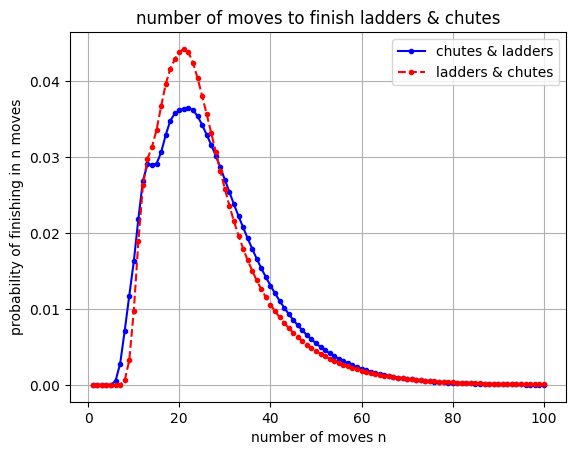

PyObject <matplotlib.legend.Legend object at 0x31f747810>

In [15]:
using PyPlot

plot(1:100, diff([((T*M)^n * e₁)[end] for n = 0:100]), "b.-")
plot(1:100, diff([((T̃*M)^n * e₁)[end] for n = 0:100]), "r.--")
xlabel("number of moves n")
ylabel("probability of finishing in n moves")
grid()
title("number of moves to finish ladders & chutes")
legend(["chutes & ladders", "ladders & chutes"])

So, the distribution is pretty similar, but it has a somewhat sharper peak (less variance), corresponding to a lower chance of taking a very short or a very long time:

The expected number of moves to finish in "ladders and chutes" is (copying the code from class)

In [16]:
sum((1:1000) .* diff([((T̃*M)^n * e₁)[end] for n = 0:1000]))

26.510124270881782

Which is very close to the number to finish "Chutes and ladders". It seems like these games are not so different after all.

## Problem 3

In class, we discussed the [power method](https://en.wikipedia.org/wiki/Power_iteration): starting with a random vector $x$ and repeatedly computing $x \leftarrow Ax / \Vert Ax \Vert$, which converges to the eigenvector with the largest $|\lambda|$ (assuming that there is a single such eigenvector).  Given an estimate $x$ for the eigenvector, the [Rayleigh quotient](https://en.wikipedia.org/wiki/Rayleigh_quotient) $x^T A x / \Vert x \Vert^2$ = `dot(x,A*x)/dot(x,x)` is an estimate for the eigenvalue.

For example, if we apply this process 100 times to the $5\times5$ matrix $R$ given by 

In [17]:
R = [ 3.15042    -0.383941   0.469052  -1.92221   -2.0107  
      0.299402    6.63455   -1.31991    1.20677   -1.34234 
     -0.391874    0.36382    3.36915   -0.384912   0.821678
     -0.53268    -1.93047    1.25815    1.37172    0.888551
     -0.0655503   2.69435   -1.12379    0.874781   0.474167 ]

5×5 Array{Float64,2}:
  3.15042    -0.383941   0.469052  -1.92221   -2.0107  
  0.299402    6.63455   -1.31991    1.20677   -1.34234 
 -0.391874    0.36382    3.36915   -0.384912   0.821678
 -0.53268    -1.93047    1.25815    1.37172    0.888551
 -0.0655503   2.69435   -1.12379    0.874781   0.474167

then we get

In [18]:
x = randn(5)
for i = 1:100
    x = R*x / norm(x)
end
dot(x,R*x)/dot(x,x)

4.999998748028063

i.e. the estimated largest-magnitude eigenvalue is 5, which matches the "exact" largest-magnitude eigenvalue computed by `eigvals`:

In [19]:
eigvals(R)

5-element Array{Float64,1}:
 5.0    
 4.0    
 1.0    
 3.00001
 2.0    

***Question:*** Suppose that instead we wanted the *smallest*-magnitude eigenvalue (minimum $|\lambda|$) and the associated eigenvector.  How could we modify the power iteration above to give us this quantity?  Try it out (modifying the code above) and make sure it works.

### Solution
The idea is that if $\lambda$ is the smallest magnitude eigenvalue of $A$, then $\lambda^{-1}$ is the biggest magnitude eigenvalue of $A^{-1}$, with the same eigenvector. So we can, instead of doing $x\leftarrow Ax/\lVert Ax\rVert$, do $x\leftarrow A^{-1}x/\lVert A^{-1}x\rVert$.   (This is a special case of a general approach called [inverse iteration](https://en.wikipedia.org/wiki/Inverse_iteration).)

(In practice you would probably compute the LU factorization of $A$, and use that to solve $Ay=x=LUy$ repeatedly by back/forward-substitution, rather than explicitly computing $A^{-1}$.

This assumes that $A^{-1}$ invertible.  However, if it were not invertible, the problem is even easier!  You would notice when doing elimination (to LU-factorize $A$) that you get a zero pivot.  This means that there is $\lambda=0$ eigenvector, and you can compute that directly from $N(A)$ via elimination without doing any inverse iterations at all.   We won't worry about this below because our matrix $R$ is invertible.

In [20]:
x = randn(5)
LU = lufact(R) # LU factorize R once, and re-use it to solve y = A⁻¹x = A \ x = LU \ x over and over.
for i = 1:100
    y = LU\x
    x = y / norm(y)
end
dot(x,R*x)/dot(x,x)

1.0000005892501627

As we can see, this converges very quickly to the smallest magnitude eigenvalue, 1 in this case.

## Problem 4

(From Strang, problem 6.3.)

A door is opened between rooms that hold $v(0) = 30$ people and $w(0) = 10$ people.  The movement between the rooms is proportional to the difference $v - w$:

$\frac{dv}{dt} = w - v \\ \frac{dw}{dt} = v - w$

**(a)** Write the problem in matrix form $du/dt = Au$ for $u=(v,w)$.  **(b)** Show that the total $v+w=40$ is constant over time.  **(c)** What are $v$ and $w$ at $t=1$ and $t=\infty$?

### Solution
#### (a)
Let $A$ be the matrix
$$A=\begin{pmatrix} -1 & 1\\ 1 & -1 \end{pmatrix}\,.$$
Then we have
$$ A\begin{pmatrix} v\\w\end{pmatrix} = \begin{pmatrix} w-v\\ v-w\end{pmatrix}$$
so we can rewrite the problem as
$$ \frac{du}{dt} = Au\,.$$
#### (b)
The total $v+w$ is equal to $y^Tu$ for $y=\begin{pmatrix}1\\1\end{pmatrix}$. Then, as in problem 5.(a),
$$\frac{d(y^Tu)}{dt}=y^T\frac{du}{dt} = y^TAu = 0$$
Since the derivative of $y^Tu$ is zero, the function is constant.
#### (c)
We have seen in class that the solution of $\frac{du}{dt}=Au$ is of the form $e^{tA}u(0)$. Let us find the eigenvalues and eigenvectors of $A$:

In [21]:
A=[-1 1
    1 -1]
eig(A)

([-2.0,0.0],
[0.707107 0.707107; -0.707107 0.707107])

That is, the eigenvalues are $\lambda_1 = -2$ and $\lambda_2 = 0$ with eigenvectors $x_1 = (1,-1)/\sqrt{2}$ and $x_2 = (1,1)/\sqrt{2}$.   We could have easily found these analytically from the quadratic characteristic equation, too. (Here, we have followed Julia and normalized the eigenvectors to length 1, but of course you can normalize them differently if you want.)

Equivalently, the general solution is of the form

$$
x(t) = c_1 \begin{pmatrix} 1 \\ -1 \end{pmatrix} e^{-2t} + c_2 \begin{pmatrix} 1 \\ 1 \end{pmatrix}
$$

where I have dropped the $\sqrt{2}$ factors from the normalization for simplicity.  We just need to get the coefficients $c_1$ and $c_2$ from the inital conditions.

### Approach 1: Expand the initial condition in the eigenvectors

The initial condition is $x(0) = (30,10)$.  We just need to expand this in the eigenvector basis to get $c_1$ and $c_2$, which corresponds to solving the $2\times2$ system of equations:

$$
\begin{pmatrix} 1 & 1 \\ -1 & 1 \end{pmatrix} \begin{pmatrix} c_1 \\ c_2 \end{pmatrix} = \begin{pmatrix} 30 \\ 10 \end{pmatrix}
$$

whose solution is:

In [22]:
[1  1
-1  1] \ [30, 10]

2-element Array{Float64,1}:
 10.0
 20.0

i.e. $c_1 = 10$, $c_2 = 20$.  So, our final solution is:

$$
\boxed{x(t) = 10 \begin{pmatrix} 1 \\ -1 \end{pmatrix} e^{-2t} + 20 \begin{pmatrix} 1 \\ 1 \end{pmatrix}}
$$

At $t = 1$, this gives

$$
x(1) = 10 \begin{pmatrix} 1 \\ -1 \end{pmatrix} e^{-2} + 20 \begin{pmatrix} 1 \\ 1 \end{pmatrix} =
\boxed{\begin{pmatrix} 20+10/e^2 \\ 20-10/e^2 \end{pmatrix}}
$$

or, numerically:

In [23]:
[20+10/e^2; 20-10/e^2]

2-element Array{Float64,1}:
 21.3534
 18.6466

This should match $e^A$ times the initial condition, computed by brute-force in Julia via `expm`, and it does:

In [24]:
expm(A*1)*[30,10]

2-element Array{Float64,1}:
 21.3534
 18.6466

Notice that the sum of the components is $20+10/e^2 + 20-10/e^2 = 40 = 30+10$, consistent with our prediction in (b).

As $t\to\infty$, only the $\lambda_2=0$ term remains, and we get:

$$
\boxed{x(\infty) = \begin{pmatrix} 20 \\ 20 \end{pmatrix}}
$$

Let's check by pluggin a large time into `expm`:

In [25]:
expm(A*1000)*[30,10]

2-element Array{Float64,1}:
 20.0
 20.0

Note that the sum of the components is $20+20=40=30+10$, consistent with what we predicted in part (b).

### Approach 2: Compute the matrix exponential

Another approach, which is a bit more labor-intensive, is to explicitly compute the matrix exponential $e^{At}$, similar to class.  (Arguably, this does more work than necessary, because the matrix exponential represents the solutions for *all* initial conditions, whereas we only need the solution for *one* initial condition.)a

So we can write
$$A= \begin{pmatrix} \sqrt{2}/2 & \sqrt{2}/2\\ -\sqrt{2}/2 & \sqrt{2}/2\end{pmatrix} \begin{pmatrix}-2 & 0 & 0 & 0\end{pmatrix}\begin{pmatrix} \sqrt{2}/2 & \sqrt{2}/2 \\ -\sqrt{2}/2 & \sqrt{2}/2\end{pmatrix}^{-1}=\begin{pmatrix} \sqrt{2}/2 & \sqrt{2}/2\\ -\sqrt{2}/2 & \sqrt{2}/2\end{pmatrix} \begin{pmatrix}-2 & 0 & 0 & 0\end{pmatrix}\begin{pmatrix} \sqrt{2}/2 & -\sqrt{2}/2 \\ \sqrt{2}/2 & \sqrt{2}/2\end{pmatrix}$$
(where we used the fact that the matrix $\begin{pmatrix}\sqrt{2}/2 & \sqrt{2}/2\\ -\sqrt{2}/2&\sqrt{2}/2\end{pmatrix}$ is orthogonal). Hence
$$e^{At} = \begin{pmatrix}\sqrt{2}/2 & \sqrt{2}/2\\ -\sqrt{2}/2&\sqrt{2}/2\end{pmatrix}\begin{pmatrix} e^{-2t} & 0 \\ 0&1\end{pmatrix}\begin{pmatrix}\sqrt{2}/2 & -\sqrt{2}/2\\ \sqrt{2}/2&\sqrt{2}/2\end{pmatrix}=\frac{1}{2}\begin{pmatrix}1+e^{-2t} & 1-e^{-2t}\\ 1-e^{-2t} & 1+e^{-2t}\end{pmatrix}\,.$$
That is
$$ u(t) = e^{At}u(0) = \begin{pmatrix}20 + 10 e^{-2t}\\ 20 -10e^{-2t}\end{pmatrix}$$
So
$$ u(1) = \begin{pmatrix} 20 + 10 e^{-2} \\ 20 -10e^{-2}\end{pmatrix}$$
While the limit of $u(t)$ for $t\to \infty$ is the steady state
$$ \begin{pmatrix} 20\\ 20\end{pmatrix}$$
since for $t\to \infty$, $e^{-2t}$ converges rapidly to $0$.

## Problem 5

### (a)

Suppose $dx/dt = Ax$.  Let $y$ be a vector in the *left nullspace* of $A$.  Show that $y^T x$ is constant over time (a "conserved quantity").

### (b)

If $M$ is a Markov matrix, explain why this means that the sum of the vector $x$ components (`sum(x)` in Julia) is conserved for $dx/dt = (M-I) x$.

### (c)

If $M$ is a Markov matrix with positive entries (recall what this means about the eigenvalues), what is the solution $dx/dt = (M-I) x$ as $t\to\infty$, in terms of the initial condition $x(0)$ and the steady-state eigenvector $x_0$ of $M$?  Explain.

### (d)

Check your answers to (b) and (c) by computing $e^{(M-I)t} x$ (`expm((M-I)*t))*x` in Julia) for your Markov matrix from problem 1 and a random starting vector `x = rand(6); x /= sum(x)` whose components sum to 1, for $t=1$ and $t=100$.

### Solution
#### (a)
Let us compute the time derivative of $y^Tx$. Using the product rule (and remembering that $\frac{dy}{dt}=0$ since $y$ is a constant)
$$ \frac{d (y^Tx)}{dt} = \left(\frac{dy}{dt}\right)^T x +y^T \frac{dx}{dt} = y^T\frac{dx}{dt} = y^T Ax=0$$
since $y^TA=0$, given that $y$ is in the left nullspace of $A$. Since the time derivative of $y^Tx$ is 0, the quantity is a constant.
#### (b)
Let us consider the vector $y$ all of whose component are 1. Then $y^T(M-I)$ is the row vector containing the sums of the columns of $M-I$. But this is just the zero vector, since $M$ is a Markov matrix (that is the sum of the columns of $M$ is 1) and so $y$ is in the left nullspace of $M-I$. Hence $y^Tx$ is a conserved quantity. But $y^Tx$ is just the sum of the components of $x$.
#### (c)
In class we have seen that the solution of $\frac{dx}{dt}=(M-I)x$ is
$$ x(t) = e^{(M-I)t}x(0)\,.$$
and in particular is a sum of terms $e^{\lambda t}$, one for each eigenvalue (assuming it is diagonalizable).  $\operatorname{Re} \lambda < 0$ eigenvalues are decaying.

Since $M$ is a Markov matrix with positive entries, its greatest-magnitude eigenvalue is λ=1 and all other eigenvalues have $|\lambda|<1$.   If $Mx=\lambda x$, then $(M-I)x=(\lambda-1)x$, i.e. $M-I$ has all the same eigenvectors as $M$ but the eigenvalues are shifted by 1.    There are two types of eigenvalues:

1. The eigenvalue $\lambda=1$ of $M$ (corresponding to the "steady state" eigenvector $x_0$ of a Markov process) becomes an eigenvalue $\lambda-1 = 0$ of $M-I$.  This is a steady state of the ODE, because $e^{0t} = 1$.

2. The other eigenvalues $|\lambda| < 1$ of $M$ have real parts $|\operatorname{Re} \lambda| < 1$ (since the real part is $|\lambda|\cos\theta$ in polar form), which means that the corresponding eigenvalue $\lambda - 1$ of $M-I$ has a real part $< 0$.   These solutions are *exponentially decaying* in the ODE.

Therefore, the solution looks like

$$
x(t) = e^{(M-I)t} x(0) = c_0 x_0 + \mbox{(exponentially decaying terms)} \to c_0 x_0
$$

as $t\to\infty$.  That is, the solutions **tend to a steady state**, and in fact to the same steady-state eigenvector as the ordinary Markov process! 

Moreover, we already showed that the sum of the components is conserved.  This gives us an additional equation that we can use to determine $c_0$:

$$
c_0 = \frac{\mbox{sum of components of } x(0)}{\mbox{sum of components of } x_0}
$$

If we normalize $x_0$ so that the sum of its components is 1 (as is typical for Markov problems), then $c_0$ is simply the **sum of the components of the initial condition** $x(0)$.
#### (d)
Let us verify our supposition.

In [26]:
# Markov matrix from problem 1
M=[0.025 0.450 0.025 0.025 0.025 0.025
   0.025 0.025 0.875 0.025 0.025 0.025
   0.025 0.025 0.025 0.025 0.025 0.875
   0.875 0.025 0.025 0.025 0.025 0.025
   0.025 0.025 0.025 0.450 0.025 0.025
   0.025 0.450 0.025 0.450 0.875 0.025]

6×6 Array{Float64,2}:
 0.025  0.45   0.025  0.025  0.025  0.025
 0.025  0.025  0.875  0.025  0.025  0.025
 0.025  0.025  0.025  0.025  0.025  0.875
 0.875  0.025  0.025  0.025  0.025  0.025
 0.025  0.025  0.025  0.45   0.025  0.025
 0.025  0.45   0.025  0.45   0.875  0.025

The solution at time $t=1$ is:

In [27]:
x = rand(6); x /= sum(x)
expm(M-I)*x

6-element Array{Float64,1}:
 0.0987824
 0.21116  
 0.215473 
 0.110599 
 0.111686 
 0.252299 

The sum of the components at $t=1$ is still 1 (up to roundoff errors):

In [28]:
sum(expm(M-I)*x)

1.0

and similarly at $t=100$

In [29]:
expm((M-I)*100)*x

6-element Array{Float64,1}:
 0.117314 
 0.21721  
 0.22613  
 0.124717 
 0.0780048
 0.236623 

In [30]:
sum(expm((M-I)*100)*x)

1.0000000000000144

Furthermore, the solution at $t=100$ exactly matches our steady-state eigenvector from problem 1 (the "PageRank"), as predicted!

## Problem 6

(From Strang, section 6.3, problem 9.)

The matrix $A = \begin{pmatrix} 0 & 1 \\ -1 & 0 \end{pmatrix}$ has eigenvalues $\pm i$ and eigenvectors $(1,\pm i)$.   Use these to solve $du/dt = Au$ for $u(0) = (4,0)$, by expanding the initial condition in terms of the eigenvectors.   Use the Euler expansion $e^{\pm i t} = \cos t \pm i \sin t$ to write your solution $u(t)$ in a form that is clearly real-valued (no $i$ factors).

### Solution
We know $\begin{pmatrix}1\\\pm i\end{pmatrix}$ are eigenvectors of $e^{At}$ with eigenvalues $e^{\pm it}$ respectively. So if we write the initial condition in terms of the eigenvectors
$$ u(0)=\begin{pmatrix}4\\0\end{pmatrix} = 2\begin{pmatrix}1\\ i\end{pmatrix} +2\begin{pmatrix} 1\\ -i\end{pmatrix}$$
we can write the general solution as
$$ u(t)=e^{At}u(0)  = 2e^{it}\begin{pmatrix}1\\i\end{pmatrix}+2e^{-it}\begin{pmatrix} 1\\ -i\end{pmatrix} = \begin{pmatrix} 2(e^{it}+e^{-it})\\ 2i (e^{it}-e^{-it})\end{pmatrix}$$
Since $e^{it}=\cos t+i\sin t$ and $e^{-it}=\cos t - i \sin t$, we can simplify the above expression as
$$ u(t) = \begin{pmatrix} 4\cos t \\ -4\sin t\end{pmatrix}$$
which is plainly real-valued.

## Problem 7

(From Strang, section 6.3, problem 26.) Give two reasons why the matrix exponential $e^{At}$ is never singular. **(a)** Write down its inverse.  **(b)** If $Ax = \lambda x$ then an eigenvalue of $e^{At}$ is what, which is nonzero because why?  Hence $N(e^{At})=\{0\}$. 

### Solution
#### (a) 
Since $At$ and $-At$ commute, we have
$$ e^{At}e^{-At} = e^{-At}e^{At} = e^{At -At}=e^0=I$$
So $e^{At}$ has inverse $e^{-At}$ and is thus invertible.
#### (b)
If $\lambda$ is an eigenvalue of $A$ with eigenvector $x$, I claim that $e^{\lambda t}$ is an eigenvalue of $e^{At}$ with eigenvector $x$. In fact
$$e^{At}x = \sum_{n\ge0} \frac{(At)^n}{n!}x = \sum_{n\ge 0} \frac{A^nx}{n!}t^n = \sum_{n\ge 0} \frac{\lambda^nx}{n!}t^n = e^{\lambda t}x\,.$$
Hence all eigenvalues of $e^{At}$ are of the form $e^{\lambda t}>0$, so 0 is not an eigenvalue of $e^{At}$. That is, $N(e^{At})=0$.